# Lecture 9: The theoretical galaxy model
## Introduction

Today, we want to build a theorethical galaxy model. We starts from our sketch, where we firstly have a galaxy and its dark matter halo. We want to fill them with relevant physical quantities, as for the galaxy itself these are:

- stellar mass $m_*$,
- distance from the galaxy d,
- age,
- metallicity Z,
- mass of the gas $m_\mathrm{gas}$,
- star formation rate SFR.

As for the DM halo, the most important quantities are:

- virial temperature T$_\mathrm{vir}$,
- virial radius R$_\mathrm{vir}$,
- virial mass m$_\mathrm{vir}$.

In order to build a model, we now have to connect the variables. We already know the dependencies of $m_*$:

$$m_* (t) = \int_{t_0}^\mathrm{age} dt \, SFR(t)  \; \; \; \; \; \mathrm{where} \, \, SFR(t) = \epsilon \cdot m_\mathrm{gas}^\alpha$$

A priori, $\epsilon$ could be a function of many things. This means that $m_\mathrm{gas}$ is a fundamental value, but we don't have it in our cigale dataset! Is it because we just have not observed it or because we can't? Molecular gas is mainly composed by H$_2$ which in principle we can't observe, as it has a lot of lines. We can then use other gas present in smaller quantities, usually CO. Since we can't extract $m_\mathrm{gas}$ from other data, let's focus on its variation in time:

$$ \frac{dm_\mathrm{gas}}{dt} = - SFR(t) + R \cdot SFR(t) + \overset{.}{m}_\mathrm{gas}^\mathrm{in} (t, ...) - \overset{.}{m}_\mathrm{gas}^\mathrm{out} (t, SFR, AGN, ...) = \overset{.}{m}_\mathrm{gas}^\mathrm{in} (t, ...) - \overset{.}{m}_\mathrm{gas}^\mathrm{out} (t, SFR, AGN, ...) - (1 - R) \cdot SFR(t)$$

where $-SFR$ refers to the gas that become stars, $R$ must be smaller than 1 and corresponds to the fraction of gas emitted by star explosions, $\overset{.}{m}_\mathrm{gas}^\mathrm{in}$ is the gas infalling in the galaxy from the halo or the intergalactic medium and finally $\overset{.}{m}_\mathrm{gas}^\mathrm{out}$ is the gas ejected by AGNs and SNs. 

As for the metallicity:

$$ \frac{dm_\mathrm{Z}}{dt} = - z \cdot SFR(t) + y \cdot SFR(t) + \overset{.}{m}_\mathrm{Z}^\mathrm{in} (t, ...) - \overset{.}{m}_\mathrm{Z}^\mathrm{out} (t, ...)$$

where $y$ is the yield and $y \cdot SFR(t)$ represents the fraction of metals emitted by SNs, $z$ is the mass fraction of metals in stars and $- z \cdot SFR(t)$ is the amount of metals locked in newly formed stars.

These two equations link all the variables and are the ones which we need to analyse to understand galaxy evolution. In particular, we need to analyse each term. 

## Kennicutt-Schmidt empirical law
The link between $m_\mathrm{gas}$ (measured using radio telescopes) and $SFR$ can be derived empirically: considering surface densities, $\alpha = 1.4$. By dividing the relation by the dynamical time (defined as the typical size of the galaxy divided by the circular velocity) the relation becomes linear and we find that each orbit about 2% of the gas becomes stars. By approximating $\alpha = 1$:

$$\Sigma_{SFR} = \epsilon_{SFR} \, \Sigma_\mathrm{gas} \, / \, t_\mathrm{dyn} $$

$$SFR = \epsilon \, m_\mathrm{gas} \, / \, t_\mathrm{dyn} = 0.02 \, m_\mathrm{gas} \, / \, t_\mathrm{dyn} $$

and $t_\mathrm{dyn}$ is on the order of $2 \times 10^7$ yr.

## Closed box model
An assumption we could make to simplify the model is to have $\overset{.}{m}_\mathrm{gas}^\mathrm{in} = \overset{.}{m}_\mathrm{gas}^\mathrm{out} = 0$, which is called the closed box assumption. This leads to the following relations:

$$m_\mathrm{gas} (t) = m_\mathrm{gas} (t_0) \cdot e^{- \epsilon' (t - t_0)} \; \; \; \; \; \mathrm{where} \, \,  \epsilon' = \frac{\epsilon}{t_\mathrm{dyn}}$$

$$SFR(t) = \epsilon' m_\mathrm{gas} (t_0) \cdot e^{- \epsilon' (t - t_0)} $$

$$m_* (t) = m_\mathrm{gas} (t_0) \cdot [1 - e^{- \epsilon' (t - t_0)}] $$

$$sSFR(t) = \frac{SFR}{m_\mathrm{gas}} = \epsilon' \cdot \frac{e^{- \epsilon' (t - t_0)}}{1 - e^{- \epsilon' (t - t_0)}} $$

We have found that the specific star formation rate doesn't depend on the initial mass of the gas! Rather, it should be almost constant, meaning that in th closed box approximation galaxy have some kind of self regulation process. We also find that $\epsilon'$ has to constant and eqaul for all galaxies, just like $t_0$, meaning galaxies have all been formed at the same time.

To prove that this model holds, we could check if it is in agreement with our data, i.e. if it can predict passive galaxies at higher mass. But our data was extracted by cigale using specific models, can the two be compared directly? Furthermore, cigale returns two results:
1. best, the overall best fit of the data;
2. bayes, where errors and degeneracies are held into account
$$ <AGE>_\mathrm{bayes} = \frac{\sum_{i}\mathcal{L}_i (AGE)}{\sum_{i}\mathcal{L}_i} \; \; \; \; where \, \, \mathcal{L} = e ^ {- \chi ^ 2 / 2} $$

in particular, bayes returns the weighted mean of the variable, in the case the age. But since cigale checks for a finite number of possible models, if the grid is not evenly spaced, some models could occour more often: i.e, if we ave a lot of points at low likelihood and a few at high llk, the low points will skew the result. 

## Analytical check of closed box model
We start by taking cigale results and finding the Main Sequence line according to the closed box model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
dyn_time = 20 * 10 ** 6
eps = 0.02
eps_prime = eps/dyn_time
print(eps_prime)

1e-09


In [4]:
SDSS_ph = Table.read('Data/SDSS_LAB2024_CIGALEresults.fits') #SDSS photometry results

In [5]:
age = SDSS_ph['bayes_sfh_age']
s_mass = SDSS_ph['bayes_stellar_m_star']
cigale_SFR = SDSS_ph['bayes_sfh_sfr']

In [6]:
#age = SDSS_ph['best_sfh_age']
#s_mass = SDSS_ph['best_stellar_m_star']
#cigale_SFR = SDSS_ph['best_sfh_sfr']

In [7]:
m_gas_0 = s_mass / (1 - np.exp(-eps_prime * age * 10**6))
#m_gas_0 = cigale_SFR * dyn_time / eps_prime

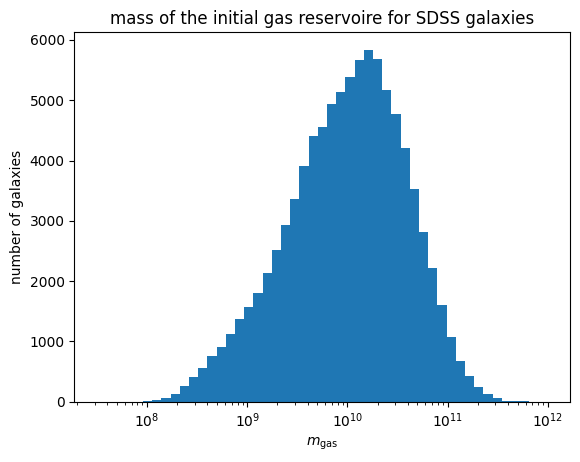

In [8]:
plt.hist(m_gas_0, np.logspace(7.5, 12))
plt.title('mass of the initial gas reservoire for SDSS galaxies')
plt.xlabel('$m_\mathrm{gas}$')
plt.ylabel('number of galaxies')
plt.semilogx()
plt.show()

In [9]:
SFR = eps_prime * m_gas_0 * np.exp(-eps_prime * age * 10**6)

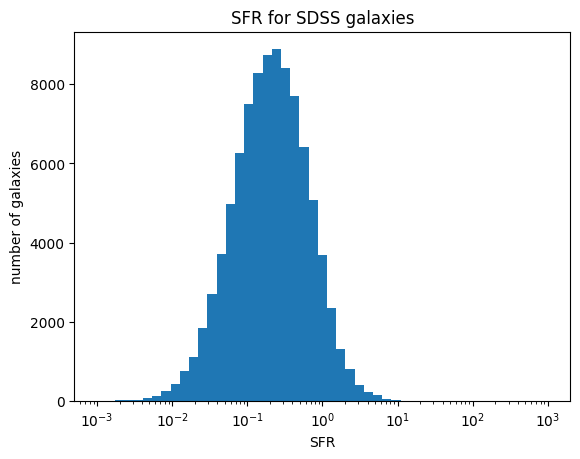

In [10]:
plt.hist(SFR, np.logspace(-3, 3))
plt.title('SFR for SDSS galaxies')
plt.xlabel('SFR')
plt.ylabel('number of galaxies')
plt.semilogx()
plt.show()

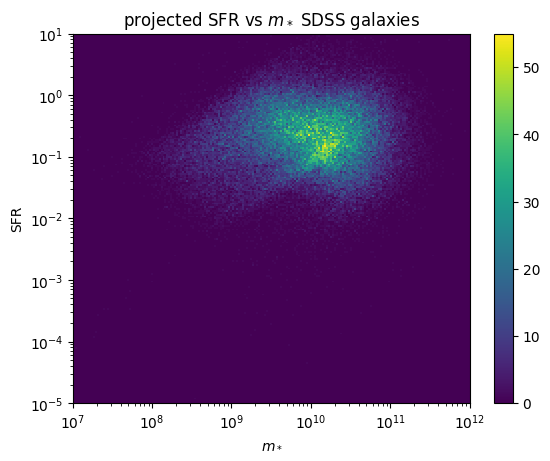

In [11]:
plt.hist2d(s_mass, SFR, [np.logspace(7, 12, 200), np.logspace(-5, 1, 200)])

plt.title('projected SFR vs $m_*$ SDSS galaxies')
plt.colorbar()
plt.xlabel(' $m_*$ ')
plt.ylabel('SFR')
plt.loglog()
plt.show()

But actually the t in the exponential isn't the age, but the characteristic time of the exponential and the two are not necesarally linked.
Having fixed $\epsilon$ prime, we can find the value of sSFR at different times and find which intersects our Main Sequence.

In [12]:
time = np.array([1E+9, 2E+9, 3E+9, 4E+9, 5E+9])
sSFR = eps_prime * (np.exp(-eps_prime * time) / (1 - np.exp(-eps_prime * time)))

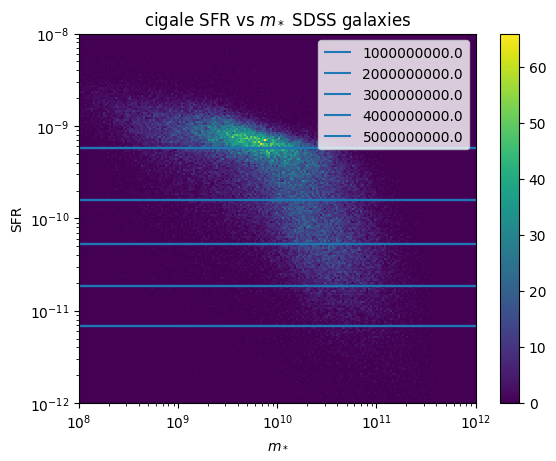

In [13]:
plt.hist2d(s_mass, cigale_SFR/s_mass, [np.logspace(8, 12, 200), np.logspace(-12, -8, 200)])
for i in range(len(sSFR)): plt.hlines(sSFR, 5E+7, 1E+12, label = time[i])
plt.title('cigale SFR vs $m_*$ SDSS galaxies')
plt.colorbar()
plt.xlabel(' $m_*$ ')
plt.ylabel('SFR')
plt.loglog()
plt.legend()
plt.show()

The lines which intersect our Main Sequence require an age which is on the order of an Hubble time: this model can't describe our data.

We should now check the cigale age of galaxies on the main sequence: if it's not within 2-4 Gyr there must be some other processes fueling their SFR.

In [14]:
ms_galaxies_n = 0 #number of galaxies on the main sequence
out_galaxies_n = 0 #number of ms galaxy outside projected age range
for i in range(len(age)):
    if cigale_SFR[i]/s_mass[i] > 5E-10 and cigale_SFR[i]/s_mass[i] < 1E-9 and s_mass[i] > 1E+9 and s_mass[i] < 4E+10: 
        ms_galaxies_n += 1
        if age[i] > 4E+3 or age[i] < 2E+3: 
            out_galaxies_n += 1
            #print('age outside range: ', age[i], ', at index: ', i)
print('number of galaxies in main sequence: ', ms_galaxies_n, ', of which ', out_galaxies_n, ' outside age range.')

number of galaxies in main sequence:  23200 , of which  4134  outside age range.


## Our question

We had asked ourselves if the presence of an AGN influences the galaxy itself and if so, how. The closed box model doesn't involve an outgoing flux of gas, which is implied by the presence of an AGN. To tackle this issue, we could add a component to the variation of $m_\mathrm{gas}$:

$$\frac{dm_\mathrm{gas}}{dt} = - (1 - R) \cdot SFR - \overset{.}{m}_\mathrm{gas}^\mathrm{out} $$

integrating with respect to time:

$$ m_\mathrm{gas} = -(1 - R) \cdot m_* - m_\mathrm{gas}^\mathrm{out} + m_\mathrm{gas}(t_0) $$

we could then solve for stellar mass and maybe fix it as a fraction of gas mass in order to solve the equation.

# Lecture 10

## Dynamical time computation
The dynamical time is defined as:
$$t_\mathrm{dyn} = 2 \times 10^7 yr \left( \frac{R}{4 \, kpc} \right) \left(\frac{v_c}{200 \, km/s}\right)^{-1} $$

where $v_c$ is defined as the "maximum" velocity, since the circular velocity caps at a certain value even incresing the radius due to the existance of dark matter. The rotational profiles of galaxies also allows us to understand where the virial theorem is applied, meaning inside which radius most f the mass is cointained. 

Our model then depends on two variables: how do we find them?
1. observe the galaxy and infer $v_c$,
2. build a theoretical framework,
3. observe a subset of galaxies to deduce empirical relations in the parameters.

For example, it has been found that $v_c$ and magnitude have a positive correlation: brighter galaxies rotate faster! We can infer $v_c$ with the following relation:

$$ log (M_* \, [M_\odot]) = a \cdot log(v_\mathrm{circ} / v_\mathrm{ref}) + b $$

from which we get:

$$v_\mathrm{circ} = v_\mathrm{ref} \cdot (M / 10^b)^{1/a} $$

In [15]:
v_ref = 242 #km/s
a = 3.60
b = 10.50
v_circ = v_ref * np.power(s_mass / (10)**b, 1/a)
#print(v_circ)

The same thing has been done for the size of the galaxy: there is a relation between size and mass, with a power $\alpha = 0.25$ for star-forming galaxies.

$$R_\mathrm{eff} / kpc = A(M_* / 5 \times 10^{10} M_\odot)^\alpha $$

In [16]:
A = 10 ** 0.7
alpha = 0.25

R_eff = A * (s_mass / 5E+10)**alpha

In [17]:
eff_dyn_time = 2E+7 * (R_eff / 4) * (v_circ / 200)**(-1)

#print(eff_dyn_time / 1E+7)

Since the exponents of the two relations are pretty similar ($\alpha = 0.25$ and 1/a = 1 /3.60) we expect a somewhat linear plot.

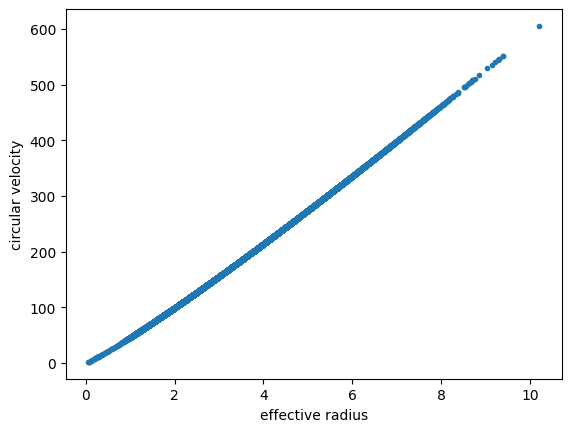

In [18]:
plt.plot(R_eff, v_circ, '.')
plt.xlabel('effective radius')
plt.ylabel('circular velocity')
plt.show()

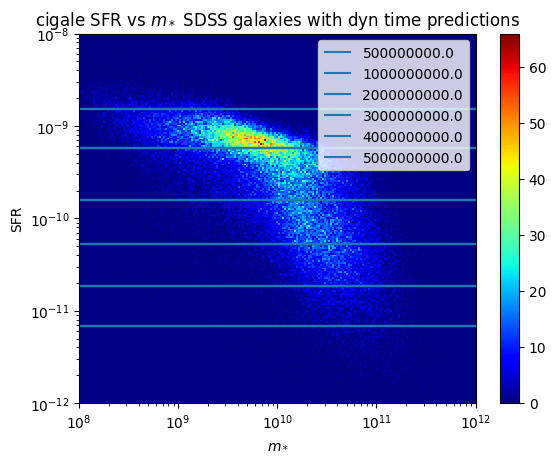

In [19]:
eps_prime = 0.02 / dyn_time
time = np.array([0.5E+9, 1E+9, 2E+9, 3E+9, 4E+9, 5E+9])
sSFR = eps_prime * (np.exp(-eps_prime * time) / (1 - np.exp(-eps_prime * time)))

plt.hist2d(s_mass, cigale_SFR/s_mass, [np.logspace(8, 12, 200), np.logspace(-12, -8, 200)], cmap = 'jet')
for i in range(len(sSFR)): plt.hlines(sSFR, 5E+7, 1E+12, label = time[i])
plt.title('cigale SFR vs $m_*$ SDSS galaxies with dyn time predictions')
plt.colorbar()
plt.xlabel(' $m_*$ ')
plt.ylabel('SFR')
plt.loglog()
plt.legend()
plt.show()

## Metallicity in the closed box model

$$ \frac{dm_Z}{dt} = y \cdot SFR - Z \cdot SFR = y \cdot SFR - \frac{m_z (t)}{m_\mathrm{gas} (t)} \cdot SFR = y \cdot SFR - \epsilon' \cdot m_Z(t) $$

$$ \frac{dm_Z}{dt} + \epsilon' m_Z = y \cdot SFR $$

We can solve using the Cauchy method, first we do:
$$y \cdot SFR = 0 \implies m_Z (t) = m_z (t_0) \cdot e ^{-\epsilon' (t-t_0)}$$

and then we invert the exponentials and integrate the initial relation:
$$\int_0^{t'} dt \; \frac{d}{dt} \left(m_z(t_0) \cdot e^{\epsilon' (t-t_0)} \cdot m_z(t)\right) = \int_0^{t'} dt\; m_z(t_0) \cdot e^{\epsilon' (t- t_0)} \cdot y SFR(t)$$

The integral on the left side simplifies and we are left with:

$$m_Z(t) = \left[\int_0^{t'} dt\; y\cdot SFR \cdot e^{\epsilon' (t- t_0)} \right] \cdot e ^{-\epsilon' (t-t_0)} $$

By substituting the closed box solution we have:

$$m_Z(t) = e ^{-\epsilon' (t-t_0)} \int_0^{t'} dt\; y \cdot \epsilon' \cdot m_\mathrm{gas} (t_0) \cdot e ^{-\epsilon' (t-t_0)} \cdot e^{\epsilon' (t- t_0)} = y \cdot \epsilon' \cdot m_\mathrm{gas}(t_0) \cdot (t-t_0) \cdot e ^{-\epsilon' (t-t_0)}$$

and writing $m_Z (t) $ explicitly gives us:

$$ Z = y \cdot \epsilon' \cdot (t-t_0)$$

which means that the metallicity should increase linearly with time (age).

In [20]:
SDSS_sp = Table.read('Data/SDSS_LAB2024_spectroscopy.fits')
met = SDSS_sp['log_oh']

In [21]:
index_to_remove = []
for i in range(len(met)):
    if met[i] == -9999:
        index_to_remove.append(i)
    
met1 = np.delete(met, index_to_remove)
age1 = np.delete(age, index_to_remove)

index_to_remove1 = []
for i in range(len(met1)):
    if np.isnan(met1[i]):
        index_to_remove1.append(i)

met2 = np.delete(met1, index_to_remove1)
age2 = np.delete(age1, index_to_remove1)

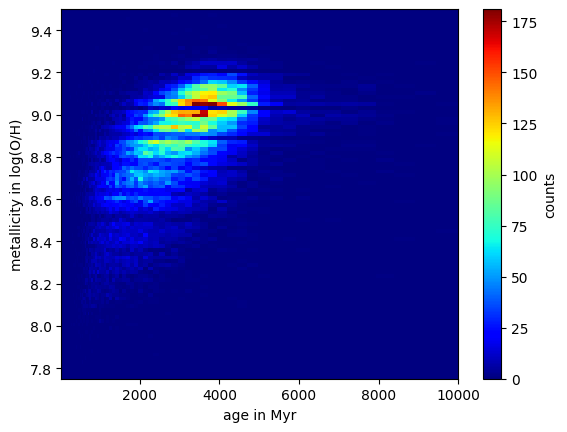

In [22]:
plt.hist2d(age2, met2, [np.logspace(1.5, 4, 100), np.linspace(7.75, 9.50, 100)], cmap = 'jet')
plt.colorbar(label = 'counts')
plt.xlabel('age in Myr')
plt.ylabel('metallicity in log(O/H)')
plt.show()

C:\Users\lm101\AppData\Local\Temp\ipykernel_13688\3331187882.py:18: RuntimeWarning: invalid value encountered in scalar divide
  bin_mean[i] = bin_mean[i] / n_bin[i]


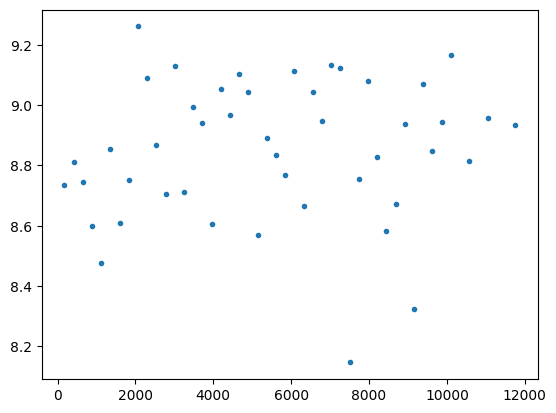

In [23]:
#---- trying to find the mean metallicity by binning the age, not working really well
age_range = max(age2) - min(age2)
interval = age_range / 50


min_interval = min(age2)
media_bin = np.zeros(50)
bin_mean = np.zeros(50)
n_bin = np.zeros(50)

for i in range(50):
    for j in range(len(age2)):
        if age2[j] > min_interval and age2[j] < min_interval + interval:
            bin_mean[i] += met2[i]
            n_bin[i] += 1
            media_bin[i] = min_interval + interval/2
    min_interval = min_interval + interval
    bin_mean[i] = bin_mean[i] / n_bin[i]

plt.plot(media_bin, bin_mean, '.')

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(age2[:, None], met2[:, None])
x = np.linspace(0, 12000, 1000)
f = model.predict(x[:, None])

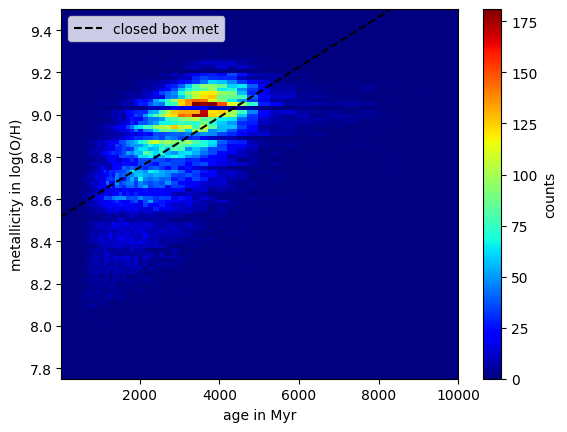

In [25]:
plt.hist2d(age2, met2, [np.logspace(1.5, 4, 100), np.linspace(7.75, 9.50, 100)], cmap = 'jet')
plt.colorbar(label = 'counts')
plt.xlabel('age in Myr')
plt.ylabel('metallicity in log(O/H)')

plt.plot(x, f, color = 'black', linestyle = 'dashed', label = 'closed box met')
plt.legend()
plt.show()

## Opening the closed box model

We want to add the inward and/or outward flux of $m_\mathrm{gas}$. Let's first try to explain the possible sources of $\overset{.}{m}_\mathrm{gas}^\mathrm{out}$.

### $\overset{.}{m}_\mathrm{gas}^\mathrm{out}$ sources
There are different components:

- **Type Ia supernovae**, which involve a white dwarf accreting its companion, a red giant.
$$\overset{.}{m}_\mathrm{gas}^\mathrm{out} \propto \alpha \beta \int_0^{2 Gyr} dt\, SFR \propto \alpha \beta$$
&nbsp; must take at least a few Gyr.

- **Type IIa supernovae**, which are basically instantaneous
$$ \overset{.}{m}_\mathrm{gas}^\mathrm{out} \propto \eta \cdot SFR $$

- **AGNs**, larger the BH larger the accretion rate
$$ \overset{.}{m}_\mathrm{gas}^\mathrm{out} \propto \lambda m_\mathrm{BH} $$

- **Ram pressure stripping**, a galaxy passing through a cluster moves at high velocity in a dense medium (the intergalactic medium, which is at around T $\simeq 10^7$ K), it will feel pressure and gas will be stripped off
$$ \overset{.}{m}_\mathrm{gas}^\mathrm{out} \propto \rho_RP \cdot v^2 $$
&nbsp; these galaxies tends to form tails and are called jellyfish galaxies.

### Finding an equilibrium

We assume the predominant component to be the second one, therefore $\overset{.}{m}_\mathrm{gas}^\mathrm{out} \simeq \overset{.}{m}_\mathrm{SNIIa}^\mathrm{out} \propto \eta \cdot SFR$. This means that the rate of gas mass becomes:
$$\frac{dm_\mathrm{gas}}{dt} = \overset{.}{m}_\mathrm{gas}^\mathrm{in} - SFR(1 + \eta - R) $$

We can also assume $\overset{.}{m}_\mathrm{gas}^\mathrm{in}$ to be small compared to $\overset{.}{m}_\mathrm{gas}^\mathrm{out}$, then:
$$\frac{dm_\mathrm{gas}}{dt} \simeq- \epsilon' m_\mathrm{gas}(t) \cdot(1 + \eta - R) $$

which is basically the closed box model. But in this way, the mass of the gas will reduce over time, until our initial assumption will not be valid anymore.

Let's assume instead that $\overset{.}{m}_\mathrm{gas}^\mathrm{in}$ is large:
$$\frac{dm_\mathrm{gas}}{dt} \simeq \overset{.}{m}_\mathrm{gas}^\mathrm{in} $$

But now the mass of the gas will increase until our current assumption is note valid either!

We have found that if for any reason one of the two assumptions is true, the galaxy will respond by increasing or decreasing $m_\mathrm{gas}$. This process will only stop once they are equal and this depends on timescales. Either way, once they get to equilibrium the following equation holds:
$$\frac{dm_{g, eq}}{dt} = 0 $$

$$m_{g, eq} \simeq \frac{\overset{.}{m}_\mathrm{gas}^\mathrm{in}}{(1 + \eta - R)\epsilon'} \implies SFR \simeq \frac{\overset{.}{m}_\mathrm{gas}^\mathrm{in}}{1 + \eta - R} \implies sSFR = \frac{\overset{.}{m}_\mathrm{gas}^\mathrm{in}}{m_*} = \frac{1}{1 + \eta - R}$$

where high $\overset{.}{m}_\mathrm{gas}^\mathrm{in}$ implies a high gas reservoire and therefore high SFR, while high $\eta$ implies a low reservoire.